In [28]:
import pandas as pd
import datetime
import numpy as np
import scipy.stats
from math import log10 , floor
import matplotlib.pyplot as plt

In [2]:
# result 구분
df = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_result_3.xlsx', engine='openpyxl') #일자, 기업
df['일자'] = pd.to_datetime(df['일자']) # 날짜 형식 변경

In [3]:
df['ESG'].value_counts()

비리       399
파업       206
산재       173
독과점      172
공급망      138
품질       107
경영권      104
환경오염      69
불공정거래     62
분식회계      57
고용        55
임금        53
개인정보      41
유해물질      31
도덕성       29
노동권       23
상생        22
성범죄       19
광고        10
Name: ESG, dtype: int64

In [84]:
df

,일자,제목,본문,기업,ESG,중복 횟수,중복 횟수(10일),AV_VOL_TOT_-5_-2,AV_VOL_TOT_-1_-1,AV_VOL_TOT_0_0,...,TO_INS_-5_-2,TO_INS_-1_-1,TO_INS_0_0,TO_INS_1_1,TO_INS_2_5,TO_FOR_-5_-2,TO_FOR_-1_-1,TO_FOR_0_0,TO_FOR_1_1,TO_FOR_2_5
0,2020-11-04,"BNK금융지주 전 간부, 주가 조종 혐의 벌금형",하루 새 100억 원대 주식을 매입해 자사 주가를 끌어올린 혐의로 재판에 넘겨진 B...,BNK금융지주,불공정거래,0,0,0.128097,-0.260732,-0.428205,...,-0.000249,-0.000287,-0.000151,-0.000013,0.000053,-0.000307,-0.000648,-0.000780,-0.000805,-0.000126
1,2020-01-13,엘시티 부실대출 성세환 전 BNK금융지주 회장에 징역 5년 구형,검찰이 엘시티 사업에 부당한 방법으로 300억 원을 대출한 혐의로 재판에 넘긴 성세...,BNK금융지주,비리,0,0,-0.454610,-0.187791,-0.119757,...,0.000251,0.000227,0.000144,0.000206,-0.000018,-0.000364,-0.000261,-0.000363,0.000234,-0.000218
2,2018-12-14,"'채용비리' 박재경 전 BNK금융지주 사장, 항소심서 감형",[ 김은지 기자 ] \n부산은행 신입행원 공개채용에서 전직 국회의원 딸을 특혜 채용...,BNK금융지주,비리,0,0,-0.095064,1.136943,-0.077858,...,-0.000187,0.001407,0.000163,0.000017,0.000799,-0.000080,0.001840,0.000213,-0.000013,0.000377
3,2018-03-20,"검찰, '채용비리' 혐의 BNK금융지주 추가 압수수색",부산은행 채용비리를 수사하는 검찰이 BNK금융지주를 추가로 압수수색했다. \n \n...,BNK금융지주,비리,0,0,-0.306752,-0.395666,-0.587188,...,-0.000137,-0.000129,-0.000423,0.000539,-0.000099,0.000012,0.000718,-0.001022,0.000393,0.000372
4,2018-03-01,'채용비리 의혹' BNK금융지주 사장 등 2명 구속영장 청구,채용비리 의혹을 받고 있는 박재경 BNK금융지주 사장과 강모 BNK저축은행 대표이사...,BNK금융지주,비리,3,10,0.069843,0.151386,0.977715,...,-0.000046,-0.000243,0.000144,-0.000287,0.000212,0.000366,0.001470,0.002444,-0.000320,0.000390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,2019-03-21,"이부진 호텔신라 사장 ""불법 투약 사실 없다"" 부인","이부진 호텔신라 대표이사 사장은 21일 ""(프로포폴)을 불법 투약한 사실이 없다""고...",호텔신라,도덕성,0,0,0.834648,0.370905,0.915821,...,0.003456,0.001842,0.004635,0.000318,-0.000294,0.003000,0.000684,-0.000031,-0.000468,-0.002625
1766,2017-07-12,면세점 비리 의혹에 한화갤러리아 '울고' 호텔신라 '웃고',신규 면세점 특허 심사 과정에서 일부 업체에 대한 특혜가 있었다는 감사원의 \n발표...,호텔신라,비리,0,0,-0.284601,-0.310572,1.536280,...,-0.000895,-0.000271,0.001246,0.000497,0.000853,-0.001097,-0.001655,0.003976,0.001040,0.000792
1767,2017-06-09,"임우재 뇌물 혐의, 이부진의 호텔신라에 ‘불똥’","이부진 호텔신라 사장(왼쪽), 임우재 전 삼성전기 고문. [사진=아주경제DB] \n...",호텔신라,비리,1,1,-0.208108,-0.005533,-0.542903,...,-0.000786,0.000270,-0.000468,-0.000535,0.000774,-0.000371,0.002079,-0.000052,-0.000761,0.001535
1768,2019-09-10,"효성중공업, 국세청 382억원 추징금 부과",[머니투데이 최태범 기자] 효성중공업은 서울지방국세청으로부터 382억원의 추징금을 ...,효성중공업,공급망,0,0,-0.332025,-0.646029,-0.715219,...,-0.000786,-0.000467,-0.000741,-0.000078,-0.000531,-0.000383,-0.000365,-0.000400,-0.000024,-0.000297


**연도별 데이터**

In [4]:
yrs = [i for i in range(2012,2022)]
yr_smp = []
for yr in yrs:
    df_yr = df[df['일자'].dt.year == yr]
    yr_smp.append(df_yr.shape[0])
    print(yr, df_yr.shape[0])    

print(sum(yr_smp))

2012 107
2013 153
2014 167
2015 200
2016 172
2017 174
2018 205
2019 213
2020 208
2021 171
1770


**산업별 기사수** \
산업기준 : 산업대분류 vs krx분류

In [4]:
#ticker찾기
df_kospi = pd.read_csv('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/data/KOSPI.csv',  encoding='cp949')
df_kospi['종목코드'] = df_kospi['종목코드'].astype(str).str.zfill(6) 
name_code = dict(zip(df_kospi['종목명'].to_list(),df_kospi['종목코드'].to_list())) # {종목명:tikcer}
code_name = dict(zip(df_kospi['종목코드'].to_list(),df_kospi['종목명'].to_list())) # {ticker:종목명}

df_fin = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/data/kospi_fin_data.xlsx', header=[0,1], engine='openpyxl') 
df_fin[('종목코드','종목코드')] = df_fin[('종목코드','종목코드')].astype(str).str.zfill(6) 
# df_fin.set_index(('종목코드','종목코드'), inplace = True) # ticker가 int로 바뀜 
# multiindex는 튜플로 호출 df[('a','b')]

code_sector_krx = dict(zip(df_fin[('종목코드','종목코드')].to_list(),df_fin[('주식업종','주식업종')].to_list())) # {ticker:산업분류krx}
code_sector_kssc = dict(zip(df_fin[('종목코드','종목코드')].to_list(),df_fin[('대분류','대분류')].to_list())) # {ticker:산업분류kssc}
print(len(code_sector_kssc)) # 795

df_news = df.copy()
df_news['종목코드'] = df_news['기업'].apply(lambda x : name_code.get(x)) # 기업이름 -> ticker col추가
df_news['krx산업'] =  df_news['종목코드'].apply(lambda x : code_sector_krx.get(x))
df_news['표준산업'] = df_news['종목코드'].apply(lambda x : code_sector_kssc.get(x))

# total
print('\nkrx\n', df_news['krx산업'].value_counts())
print('\nkssc\n',df_news['표준산업'].value_counts())
# 맥쿼리인프라 제외됨 -> 추가

795

krx
 운수장비     327
전기,전자    177
화 학      164
유통업      133
운수창고     132
건설업      122
서비스업     117
음식료업      98
철강,금속     97
통신업       94
금융업       74
의약품       70
업종미분류     49
전기가스업     39
증권        29
보험        24
비금속광물     10
기계         8
종이,목재      4
섬유,의복      2
Name: krx산업, dtype: int64

kssc
 C00000/제조업 (10 ~ 33)                      994
G00000/도매 및 소매업(45~47)                    133
H00000/운수업(49~52)                         132
J00000/출판, 영상, 방송통신 및 정보서비스업 (58 ~ 63)    128
K00000/금융 및 보험업 (64 ~ 66)                 124
F00000/건설업 (41 ~ 42)                      122
R00000/예술, 스포츠 및 여가관련 서비스업(90~91)          49
D00000/전기, 가스, 증기 및 수도사업 (35 ~ 36)         39
S00000/협회 및 단체, 수리 및 기타 개인 서비스업(94~96)     13
A00000/농업, 임업 및 어업 (01 ~ 03)               12
M00000/전문, 과학 및 기술 서비스업 (70 ~ 73)          12
N00000/사업시설관리 및 사업지원 서비스업 (74 ~ 75)        12
Name: 표준산업, dtype: int64


In [5]:
E =['환경오염']
S= ['파업','산재','고용','임금','노동권', '독과점','공급망','상생','품질','개인정보','유해물질','광고','성범죄'] 
G = ['비리','도덕성','경영권','불공정거래','분식회계']
ESG = [E,S,G]


In [144]:
# 각 pillar 별 기사 수 & 연도별
for pillar in ESG:
    df_pillar = df[df['ESG'].isin(pillar)]
    print(df[df['ESG'].isin(pillar)].shape[0])
    for yr in yrs:
        df_yr = df_pillar[df_pillar['일자'].dt.year == yr]
        yr_smp.append(df_yr.shape[0])
        print(yr, df_yr.shape[0])  

# labor =['파업','산재','고용','임금','노동권'] 
# supply = ['독과점','공급망','상생']
# consumer = ['품질','개인정보','유해물질','광고']
# corrupt =['비리','도덕성'] 
# esg_main = [labor, supply, consumer, corrupt]
# for main in esg_main:
#     print(main, df[df['ESG'].isin(main)].shape[0])

# esg_sub = E + S + G
# for sub in esg_sub:
#     print(sub, df[df['ESG'].isin([sub])].shape[0])

69
2012 1
2013 8
2014 4
2015 3
2016 5
2017 7
2018 6
2019 19
2020 9
2021 7
1050
2012 73
2013 85
2014 95
2015 115
2016 110
2017 96
2018 112
2019 131
2020 126
2021 107
651
2012 33
2013 60
2014 68
2015 82
2016 57
2017 71
2018 87
2019 63
2020 73
2021 57


### 전년도에 사건이 발생했을 때 해당년도에 사건이 발생할 확률 : P(S(t)|S(t-1)) 

In [39]:
#기업list
df_pillar = df[df['ESG'].isin(G)] #######################여기서 E/S/G 구분
firm_lst = df_pillar['기업'].value_counts().index.to_list()

# 기업-연도별 E S G 사건 발생 확률
event_no =[]
for f in firm_lst:
    df_firm = df_pillar[df_pillar['기업']==f]
    event_firm_no =[]
    for yr in range(2012,2022):
        df_firm_year = df_firm[df_firm['일자'].dt.year==yr]
        
#         df_firm_year.reset_index(inplace=True, drop=True)
        event_firm_no.append(float(df_firm_year.shape[0]))
    event_no.append(event_firm_no)
event_no = np.array(event_no)


# 해당 기업의 해당년도에 시가총액이 존재하는지 -> 비상장일 제거
for i, f in enumerate(firm_lst):
    code = name_code.get(f)
    df_value = df_fin[df_fin['종목코드','종목코드'] == code]['시가총액']
    for j, yr in enumerate(range(2012,2022)):
        if df_value[yr].isnull().any() :
            event_no[i,j] = np.nan

# df_firm_year = pd.DataFrame(event_no, index=firm_lst, columns=range(2012,2022))

markov = []
for i in range(event_no.shape[0]):
    for j in range(1, event_no.shape[1]):
        if (event_no[i][j-1] == 0) and (event_no[i][j] == 0) :
            markov.append(1)
        elif (event_no[i][j-1] == 0) and (event_no[i][j] != 0) :
            markov.append(2)
        elif (event_no[i][j-1] != 0) and (event_no[i][j] == 0) :
            markov.append(3)
        elif (event_no[i][j-1] != 0) and (event_no[i][j] != 0) :
            markov.append(4)

m = np.reshape([markov.count(i)/len(markov) for i in range(1,5)], (2,2)) 
print(m, len(markov)==event_no.shape[0]*(event_no.shape[1]-1))
print(event_no.shape)
print(np.nansum(event_no))

[[0.52194211 0.15873016]
 [0.15873016 0.16059757]] True
(119, 10)
650.0


E: [[0.90347924 0.01795735]
 [0.02974186 0.04882155]]

S: [[0.58249158 0.12121212]
 [0.12794613 0.16835017]] True
1041.0
 
G: [[0.67789001 0.09539843]
 [0.10381594 0.12289562]] True
650.0
 

### 시점 근처에서 사건이 발생할 확률

In [75]:
import datetime
# df는 이미 날짜순으로 내림차순 정렬됨

for pillar in [E,S,G]:
    df_pillar = df[df['ESG'].isin(pillar)] #######################여기서 E/S/G 구분
#     df_pillar.sort_values(by=['일자'], ascending=[False] ,inplace=True)
    firm_lst = df_pillar['기업'].value_counts().index.to_list()
#     print(len(firm_lst))
    count = []
    
    for f in firm_lst:
        df_firm = df_pillar[df_pillar['기업']==f]
        df_firm.reset_index(inplace=True, drop=True)
        
        for i in range(df_firm.shape[0]): # 최초의 사건은 0으로 처리
            if i-1 < df_firm.shape[0]: 
                c = 0
                for j in range(i+1, df_firm.shape[0]):
                    if df_firm.iloc[i]['일자'] - df_firm.iloc[j]['일자'] < datetime.timedelta(days=30): ##############여기서 일자간격 결정
                        c += 1
#                         print(df_firm.iloc[i]['일자'] , df_firm.iloc[j]['일자'], f)
                    else:
                        break
                count.append(c)
            if i-1 == df_firm.shape[0]:  # last one (최초의사건)
                count.append(0)
#     print(count)
    print(round(sum(count)/len(count),3))


0.101
0.196
0.151


In [ ]:
print(69/25, 1050/155, 650/119) # E S G 각각 기업당 평균 발생건수

# std
# 개별 기업마다 발생 횟수 lst

# median

In [42]:

# 발생건수로 normalize하면 차이가 없는지
print(0.068/2.76, 0.114/6.77, 0.086/5.46) # 20일
print(0.159/2.76, 0.23/6.77, 0.184/5.46) # 30일
print(0.273/2.76, 0.588/6.77, 0.451/5.46) # 60일
print(0.773/2.76, 1.21/6.77, 0.941/5.46) # 120일
# 없는건가..?

2.76 6.774193548387097 5.46218487394958
0.024637681159420294 0.01683899556868538 0.01575091575091575
0.05760869565217392 0.033973412112259974 0.0336996336996337
0.09891304347826088 0.08685376661742984 0.0826007326007326
0.28007246376811595 0.17872968980797638 0.17234432234432234


### refine 전 데이터 사용 : df2 
정제: 10일 사이 중복되면 삭제
정제하기 전이라도 같은 날 기사는 중복으로 count 후 삭제된 상태

In [82]:
# result 구분
df2 = pd.read_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AR.xlsx', engine='openpyxl') #일자, 기업
df2['일자'] = df2['일자'].astype(str)
df2['일자'].str[-8:]
df2['일자'] = pd.to_datetime(df2['일자'])

In [83]:
df2

,일자,언론사,기고자,제목,키워드,특성추출(가중치순 상위 50개),본문,URL,기업,E,...,AR_13,AR_14,AR_15,CAR_0_1,CAR_0_3,CAR_0_5,CAR_-1_1,CAR_-1_3,CAR_-1_5,CAR_-5_5
0,2021-11-29,경향신문,이혜리 기자 lhr@kyunghyang.com,"또 삼성전자 노동자, 산재조사 결과 기다리다 사망","삼성전자,노동자,산재,조사,결과,사망,산재,역학,조사,LCD,근무,뇌종양,30대,근...","역학조사,연구원,뇌종양,반도체,반올림,lcd,노동자,근로복지공단,삼성전자,산업안전보...",너무 느린 산재 역학조사\n\n\n\nLCD 근무 중 ‘뇌종양’ 30대 \n근로공단...,https://www.khan.co.kr/national/labor/article/...,삼성전자,NaN,...,-0.003116,-0.001195,0.006598,0.019572,0.044774,0.041908,0.015282,0.040485,0.037619,0.070346
1,2021-10-12,아주경제,김수지,"삼성전자 노사, 신경전에 ‘상견례’만 두 번째 임금교섭 기싸움","삼성전자,노사,신경전,상견례,임금교섭,기싸움,노조,임금,교섭,요구,회사,전달,일정,...","삼성전자,임금교섭,상견례,1인,위원장,관계자,요구안,부사장,성과급,리더스인",삼성전자 노사가 두 번째 만남에서 상견례를 하고 임금교섭 요구안을 전달하며 협상의 ...,http://www.ajunews.com/view/20211012150628176,삼성전자,NaN,...,0.000186,-0.001348,0.011292,-0.033971,-0.039026,-0.036559,-0.034300,-0.039355,-0.036888,-0.035299
2,2021-09-30,아주경제,장문기,"삼성전자, ‘사내급식 몰아주기’ 제재 공정위 상대로 행정소송 제기","삼성전자,사내급식,상대,제재,공정위,행정,소송,제기,사내,급식,일감,계열사,혐의,2...","공정위,삼성,삼성전자,과징금,사내급식,행정소송,의결서,서울,부당지원,시정명령,삼성전...",사내급식 일감을 계열사에 몰아준 혐의로 2000억원대 과징금을 받은 삼성이 공정거래...,http://www.ajunews.com/view/20210930072759450,삼성전자,NaN,...,0.000502,0.003238,-0.007624,0.001236,0.012175,-0.001534,-0.015444,-0.004506,-0.018214,-0.016183
3,2021-09-29,헤럴드경제,온라인뉴스 기자,"'급식 몰아주기'에 2300억 과징금 받은 삼성전자, 공정위 상대 행정소송 제기","급식,과징금,삼성전자,공정위,상대,행정,소송,제기,사내,급식,일감,계열사,혐의,20...","공정위,삼성,사내식당,삼성전자,과징금,4개,행정소송,사업장,상반기,2300억,시정명...",[헤럴드경제]사내급식 일감을 계열사에 몰아준 혐의로 2000억원이 넘는 과징금을 받...,http://biz.heraldcorp.com/view.php?ud=20210929...,삼성전자,NaN,...,0.001003,0.000502,0.003238,-0.019474,-0.010223,-0.017886,-0.026093,-0.016842,-0.024505,-0.004728
4,2021-08-12,한겨레,이우연,"경실련, ‘삼성웰스토리 일감 몰아주기’ 삼성전자 사장 등 추가고발","경실련,삼성웰스토리,일감,삼성전자,사장,추가고발,경제정의실천시민연합,경실련,최지성,...","삼성전자,삼성웰스토리,경실련,계열사,공정위,4개,웰스토리,고발장,공정거래법,삼성그룹...",경제정의실천시민연합(경실련)은 12일 최지성 전 삼성그룹 미래전략실장과 정현호 삼성...,http://www.hani.co.kr/arti/society/society_gen...,삼성전자,NaN,...,-0.001119,-0.000697,-0.000043,-0.037514,-0.040392,-0.025301,-0.051751,-0.054630,-0.039538,-0.061067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6864,2014-12-18,아시아경제,임혜선,"참엔지니어링, 전 대표 횡령 배임 혐의 피소 확인","참엔지니어링,대표,횡령,배임,확인,혐의,피소,참엔지니어링,18일,대표이사,최대주주,...","대표이사,참엔지니어링,거래소,한국,임직원,임직원들,조회공시요구,서울중앙지검,한국거래...",[아시아경제 임혜선 기자]참엔지니어링은 18일 전 대표이사(최대주주)등 횡령 배임 ...,http:www.asiae.co.kr/news/view.htm?idxno=20141...,참엔지니어링,NaN,...,-0.010527,0.001948,0.001983,-0.008418,-0.131880,0.038595,-0.013580,-0.137041,0.033433,0.005912
6865,2014-09-24,한국경제,조재길,참엔지니어링 역외 탈세 혐의 세무조사,"세무조사,참엔지니어링,역외,탈세,혐의,세무,조사,반도체,장비,제조,업체,참엔지니어링...","참엔지니어링,국세청,세무조사,한국,한인수,대주주,매입액,싱가포르,반도체,베트남,18...",[ 조재길 기자 ] 반도체장비 제조업체인 참엔지니어링이 역외 탈세 혐의로 고\n강도...,NaN,참엔지니어링,NaN,...,-0.008945,-0.003518,-0.008647,0.071078,0.086285,0.111073,-0.058070,-0.042863,-0.018075,-0.027624
6866,2012-09-30,아주경제,임하늘,"참엔지니어링 대표, 주가조작 항소심서 ‘집행유예’","참엔지니어링,대표,주가,조작,항소,집행유예,경제,임하늘,디스플레이,패널,제조,업체,...","한씨,참엔지니어링,집행유예,시세조종,재판부,임하늘,서울고법,부당이득,허위매수주문,통...",아주경제 임하늘 기자=디스플레이 패널 제조업체인 참엔지니어링 대표이사인 한모씨(52...,http://www.ajunews.com/view/20120930000051,참엔지니어링,NaN,...,-0.005935,0.005231,-0.014811,-0.000463,-0.010613,0.038533,-0.022255,-0.032405,0.016741,0.002157
6867,2020-03-18,경상일보,이춘봉,‘원산지 조작’ 한국프랜지 전 현직 임원 중형 구형,"원산지,조작,한국프랜지,현직,구형,임원,중형,저가,중국,인도산,제품,자신들,생산,국...","원산지,중국,한국프랜지공업,피고인,한국프랜지,사용처,10여년,자신들,국내산,가중처벌...",저가의 중국 인도산 제품을 자신들이 생산한 국산 제품인 것처럼 속여 수백억원대의 차...,www.ksilbo.co.kr/news/articleView.html?idxno=7...,한국프랜지,NaN,...,-0.005539,0.010667,0.015923,-0.052931,-0.050099,-0.061433,0.042290,0.045122,0.033788,-0.155149


In [84]:
df2.sort_values(by=['일자','기업'], ascending=[False, True] ,inplace=True)

In [85]:
df2.shape # AR~CAR data 있음

(6869, 87)

In [86]:
# 각 pillar 별 기사 수 & 연도별
for pillar in ESG:
    df_pillar = df2[df2['ESG'].isin(pillar)]
    print(df_pillar.shape[0])

200
3972
2697


In [113]:
import datetime

for pillar in [E,S,G]:
    df_pillar = df2[df2['ESG'].isin(pillar)] #######################여기서 E/S/G 구분
    firm_lst = df_pillar['기업'].value_counts().index.to_list()
#     print(len(firm_lst))
    count = []
    
    for f in firm_lst:
        df_firm = df_pillar[df_pillar['기업']==f]
        df_firm.reset_index(inplace=True, drop=True)
        
        count_temp = [] # 각 기업의 범위 내 사건 수
        for i in range(df_firm.shape[0]): # 최초의 사건은 0으로 처리
            if i-1 < df_firm.shape[0]: 
                c = 0
                for j in range(i+1, df_firm.shape[0]):
                    if df_firm.iloc[i]['일자'] - df_firm.iloc[j]['일자'] < datetime.timedelta(days=10): ##############여기서 일자간격 결정
                        c += 1
#                         print(df_firm.iloc[i]['일자'] , df_firm.iloc[j]['일자'], f)
                    else:
                        break
                count_temp.append(c)
            if i-1 == df_firm.shape[0]:  # last one (최초의사건)
                count_temp.append(0)
            count.append(sum(count_temp)/len(count_temp))
#     print(count)
    print(round(sum(count)/len(count),3))


0.446
1.642
1.396


<5일> 0.335 0.943 0.923
<10일> 0.46 1.749 1.681
<20일> 0.65 2.992 2.884
<30일> 0.845 4.134 3.966
<60일> 1.235 6.928 6.508


In [109]:
print(200/444, 3972/2076, 2697/1908) # E S G 각각 기업당 평균 발생건수: event_no에서 nan이 없는 cell 기준
print(200/45, 3972/221, 2697/198) # E S G 각각 기업당 평균 발생건수: 기업 수

0.45045045045045046 1.9132947976878614 1.4135220125786163
4.444444444444445 17.97285067873303 13.621212121212121


standar deviation

In [197]:
for pillar in [E,S,G]:
    df_pillar = df2[df2['ESG'].isin(pillar)] #######################여기서 E/S/G 구분
    firm_lst = df_pillar['기업'].value_counts().index.to_list()
#     print(len(firm_lst))
    
    diffs = np.array([])
    for f in firm_lst:
        df_firm = df_pillar[df_pillar['기업']==f]
        df_firm.reset_index(inplace=True, drop=True)
        if df_firm.shape[0] <= 30: # singleton
            continue 
        else:
            df_firm['일자차이'] = df_firm['일자'] - df_firm['일자'].shift(-1)
            diff = np.array(df_firm['일자차이'].dt.days.to_list()[:-1])
#             print(np.std(diff))
        diffs = np.append(diffs, np.std(diff, ddof=0))
    print(len(diffs))
    print(np.nanmean(diffs))

# 19
# 277.17918370365777
# 131
# 292.9688443564039
# 118
# 288.991235536618

1
52.95239935283596
25
96.6323085122804
19
110.9962976046427


C:\Users\Jeongseok_Bang\AppData\Local\Temp\ipykernel_5188\3710551786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['일자차이'] = df_firm['일자'] - df_firm['일자'].shift(-1)
C:\Users\Jeongseok_Bang\AppData\Local\Temp\ipykernel_5188\3710551786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_firm['일자차이'] = df_firm['일자'] - df_firm['일자'].shift(-1)
C:\Users\Jeongseok_Bang\AppData\Local\Temp\ipykernel_5188\3710551786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [114]:
#기업list
df_pillar = df2[df2['ESG'].isin(E)] #######################여기서 E/S/G 구분
firm_lst = df_pillar['기업'].value_counts().index.to_list()

# 기업-연도별 E S G 사건 발생 확률
event_no =[]
for f in firm_lst:
    df_firm = df_pillar[df_pillar['기업']==f]
    event_firm_no =[]
    for yr in range(2012,2022):
        df_firm_year = df_firm[df_firm['일자'].dt.year==yr]
        
#         df_firm_year.reset_index(inplace=True, drop=True)
        event_firm_no.append(float(df_firm_year.shape[0]))
    event_no.append(event_firm_no)
event_no = np.array(event_no)


# 해당 기업의 해당년도에 시가총액이 존재하는지 -> 비상장일 제거
for i, f in enumerate(firm_lst):
    code = name_code.get(f)
    df_value = df_fin[df_fin['종목코드','종목코드'] == code]['시가총액']
    for j, yr in enumerate(range(2012,2022)):
        if df_value[yr].isnull().any() :
            event_no[i,j] = np.nan

# df_firm_year = pd.DataFrame(event_no, index=firm_lst, columns=range(2012,2022))

markov = []
for i in range(event_no.shape[0]):
    for j in range(1, event_no.shape[1]):
        if (event_no[i][j-1] == 0) and (event_no[i][j] == 0) :
            markov.append(1)
        elif (event_no[i][j-1] == 0) and (event_no[i][j] != 0) :
            markov.append(2)
        elif (event_no[i][j-1] != 0) and (event_no[i][j] == 0) :
            markov.append(3)
        elif (event_no[i][j-1] != 0) and (event_no[i][j] != 0) :
            markov.append(4)

m = np.reshape([markov.count(i)/len(markov) for i in range(1,5)], (2,2)) 
print(m, len(markov)==event_no.shape[0]*(event_no.shape[1]-1))
print(event_no.shape)
print(np.nansum(event_no))

# nan 제외 개수
k = 0
for row in event_no:
    for cell in row:
        if not np.isnan(cell):
            k += 1
print(k, '<', event_no.shape[0]*event_no.shape[1])

[[0.65432099 0.14320988]
 [0.12839506 0.07407407]] True
(45, 10)
200.0
444 < 450


[[0.65432099 0.14320988]
 [0.12839506 0.07407407]] True
(45, 10)
200.0
444 < 450

[[0.46153846 0.15585721]
 [0.16339869 0.21920563]] True
(221, 10)
3958.0
2076 < 2210

[[0.53142536 0.14141414]
 [0.15207632 0.17508418]] True
(198, 10)
2694.0
1908 < 1980

In [115]:
# 검색에 사용한 단어 수
Ewords = '환경법, 환경보전법, 환경부, 배출, 미세먼지, 오염, 대기오염, 수질오염, 토지오염, 매립, 폐기물, 폐수'.split(', ') # 띄어쓰기!!!!
Swords = '폭발, 누출, 화재, 개인정보, 보안, 우롱, 사기, 제품, 품질, 리콜, 장애, 안정성, 독성, 유해, 허위광고, 착취, 아동착취, 성폭력, 성차별, 독점, 담합, 골목, 상권, 불공정, 반경쟁, 일감, 협력사, 하도급, 계열사, 내부거래, 과로, 근로환경, 와해, 사찰, 도청, 파견, 산재, 산업안전, 파업, 구조조정, 해고, 퇴직, 임금, 작업환경, 성과급'.split(', ')
Gwords = '불공정거래, 시세조종, 주가조작, 미공개정보, 내부거래, 내부자거래, 부정거래, 보고의무, 공시의무, 리베이트, 물적분할, 분식회계, 낙하산, 부실경영, 성과급, 보수, 부정채용, 채용비리, 로비, 리베이트, 뇌물, 횡령, 배임, 포탈, 탈세, 추징, 접대, 청탁, 정치자금, 정치 자금, 금품, 뒷돈, 비자금, 비리, 투약, 갑질, 국정농단, 경영권, 경영진, 이사진, 임원, 지배구조'.split(', ')
print(len(Ewords), len(Swords), len(Gwords))

12 45 42


In [1]:
print(69/1770, 1050/1770, 651/1770)

0.03898305084745763 0.5932203389830508 0.3677966101694915


In [5]:
################ 기사 수 분석########################
print('기사 수',df.shape[0])
esg_cate = df['ESG'].value_counts() 
esg_lst = esg_cate.index.to_list() # ESG 종류
print('기업종류', len(df['기업'].value_counts().index.to_list()))
print('ESG 종류', len(esg_lst))
# print('ESG 통계\n', esg_cate)

기사 수 1770
기업종류 198
ESG 종류 19


In [5]:
df.describe()

,중복 횟수,중복 횟수(10일),AV_VOL_TOT_-5_-2,AV_VOL_TOT_-1_-1,AV_VOL_TOT_0_0,AV_VOL_TOT_1_1,AV_VOL_TOT_2_5,AV_VOL_IND_-5_-2,AV_VOL_IND_-1_-1,AV_VOL_IND_0_0,...,TO_INS_-5_-2,TO_INS_-1_-1,TO_INS_0_0,TO_INS_1_1,TO_INS_2_5,TO_FOR_-5_-2,TO_FOR_-1_-1,TO_FOR_0_0,TO_FOR_1_1,TO_FOR_2_5
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,...,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,1.563277,3.609605,0.043051,0.031858,0.228215,0.203593,0.081487,0.092634,0.083897,0.334781,...,0.000002,0.000019,0.000139,0.000106,0.000007,0.000050,0.000067,0.000305,0.000125,0.000039
std,3.684675,8.085161,1.336635,1.584777,2.665837,2.469538,1.819704,2.371972,1.936459,3.512854,...,0.000790,0.001240,0.001850,0.001296,0.000755,0.001078,0.002093,0.004411,0.001430,0.000910
min,0.000000,0.000000,-2.022369,-2.066941,-2.589431,-2.862409,-2.054736,-1.964315,-2.030561,-2.442605,...,-0.002939,-0.003451,-0.003138,-0.002663,-0.002338,-0.005003,-0.005779,-0.006478,-0.005822,-0.007088
25%,0.000000,0.000000,-0.376176,-0.453163,-0.442740,-0.436978,-0.405853,-0.443361,-0.526113,-0.492128,...,-0.000289,-0.000372,-0.000343,-0.000356,-0.000296,-0.000351,-0.000476,-0.000430,-0.000408,-0.000343
50%,0.000000,1.000000,-0.122011,-0.166306,-0.123795,-0.108158,-0.118200,-0.164952,-0.211210,-0.154895,...,-0.000077,-0.000123,-0.000104,-0.000089,-0.000069,-0.000083,-0.000130,-0.000106,-0.000126,-0.000083
75%,1.000000,4.000000,0.211634,0.202536,0.284515,0.252204,0.199574,0.223115,0.220279,0.315538,...,0.000159,0.000162,0.000202,0.000213,0.000161,0.000225,0.000239,0.000320,0.000270,0.000203
max,41.000000,106.000000,38.308156,42.713483,67.572703,61.939920,46.669741,86.741861,42.360116,85.001669,...,0.014000,0.024097,0.043618,0.021504,0.009797,0.016891,0.058226,0.155976,0.024249,0.008283


## t-test

In [3]:
# window = [(-5,-4),(-3,-2),(-1,1),(2,3),(4,5)]
window = [(-5,-2),(-1,-1),(0,0),(1,1),(2,5)]
# window = [(-5,-1),(0,0),(1,5)]
initial = -5 
final = 5
period = 200 # 평균값을 계산하는 기간

In [4]:
# mean, t-test

def col_gen(ms, invs):
    col_temp = []
    for m in ms:
        for inv in invs:
            col_temp.append(m+'_'+inv)
    column = []
    for c in col_temp:
        for a,b in window:
            column.append(c+'_'+str(a)+'_'+str(b))
    return column
    

In [5]:
col_AV = col_gen(['AV_VOL', 'AV_VAL'],['TOT','IND', 'INS' ,'FOR'])
col_BSI = col_gen(['BSI'],['IND', 'INS' ,'FOR'])
col_TO = col_gen(['TO'],['TOT','IND', 'INS' ,'FOR'])

In [6]:

for col in col_AV :  
    t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_BSI:
    t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_TO:
    t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))

AV_VOL_TOT_-5_-2 
 mean: 0.04305 t-stats: 1.35506 p-value: 0.17557
AV_VOL_TOT_-1_-1 
 mean: 0.03186 t-stats: 0.84573 p-value: 0.39782
AV_VOL_TOT_0_0 
 mean: 0.22821 t-stats: 3.60161 p-value: 0.00032
AV_VOL_TOT_1_1 
 mean: 0.20359 t-stats: 3.46844 p-value: 0.00054
AV_VOL_TOT_2_5 
 mean: 0.08149 t-stats: 1.88397 p-value: 0.05973
AV_VOL_IND_-5_-2 
 mean: 0.09263 t-stats: 1.64304 p-value: 0.10055
AV_VOL_IND_-1_-1 
 mean: 0.0839 t-stats: 1.82275 p-value: 0.06851
AV_VOL_IND_0_0 
 mean: 0.33478 t-stats: 4.00947 p-value: 6e-05
AV_VOL_IND_1_1 
 mean: 0.31614 t-stats: 4.02399 p-value: 6e-05
AV_VOL_IND_2_5 
 mean: 0.17321 t-stats: 2.90943 p-value: 0.00367
AV_VOL_INS_-5_-2 
 mean: 0.00101 t-stats: 0.04397 p-value: 0.96493
AV_VOL_INS_-1_-1 
 mean: -0.0059 t-stats: -0.2053 p-value: 0.83736
AV_VOL_INS_0_0 
 mean: 0.08865 t-stats: 2.30796 p-value: 0.02112
AV_VOL_INS_1_1 
 mean: 0.13635 t-stats: 2.54789 p-value: 0.01092
AV_VOL_INS_2_5 
 mean: 0.04234 t-stats: 0.84949 p-value: 0.39572
AV_VOL_FOR_-5_-2 


# 엑셀로 정리

In [10]:
def col_gen_m(ms, invs):
    col_temp = []
    for m in ms:
        for inv in invs:
            col_temp.append(m+'_'+inv)
    return col_temp

In [11]:
col_m = col_gen_m(['AV_VOL', 'AV_VAL','BSI','TO'],['TOT','IND', 'INS' ,'FOR'])
col_m.remove('BSI_TOT')

In [12]:
col_m

['AV_VOL_TOT',
 'AV_VOL_IND',
 'AV_VOL_INS',
 'AV_VOL_FOR',
 'AV_VAL_TOT',
 'AV_VAL_IND',
 'AV_VAL_INS',
 'AV_VAL_FOR',
 'BSI_IND',
 'BSI_INS',
 'BSI_FOR',
 'TO_TOT',
 'TO_IND',
 'TO_INS',
 'TO_FOR']

In [130]:
df_result = []
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    ms_win_result = []
    for col in ms_win: 
        m= df[col].mean()
        if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0) #######0인지 1인지 // winsorize? ##############
        else: # 그외 0
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0) 
        ms_win_result.append([m,t_stat, p_value])
    ms_win_result = np.array(ms_win_result)
    ms_win_result = np.transpose(ms_win_result)
    
    if i == col_m[0]:
        df_result = ms_win_result
    else:
        df_result = np.vstack((df_result,ms_win_result))
    

subcol = ['mean','t_stat','p_value']

index = pd.MultiIndex.from_product([col_m, subcol])
df_result = pd.DataFrame(df_result, index = index, columns = window)

df_result = []
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    ms_win_result = []
    for col in ms_win: 
        m= df[col].mean()
        if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0) ####################0인지 1인지####################
        else: # 그외 0
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
        ms_win_result.extend([m,t_stat, p_value])
    df_result.append(ms_win_result)

subcol = ['mean','t_stat','p_value']


### mean 옆에 asterisk 붙여서 출력하기

In [61]:
# 유효숫자 함수
def round_it(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)

df_result = []
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    ms_win_result = []
    for col in ms_win: 
        m= df[col].mean()
        if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0) #################### 0인지 1인지 ####################
        else: # 그외 0
            t_stat, p_value = scipy.stats.ttest_1samp(df[col], 0)
        
        
        m=str(round_it(m,3))  # 유효숫자 3자리
        t_stat = '%.2f' % t_stat  # 소수점 둘째 자리

        if 0.05 <= p_value < 0.1:
            m = m+'*'
        elif 0.01 <= p_value < 0.05:
            m = m+'**'
        elif p_value < 0.01:
            m = m+'***'

        ms_win_result.append([m,t_stat])
    
    ms_win_result = np.array(ms_win_result)
    ms_win_result = np.transpose(ms_win_result)
    
    if i == col_m[0]:
        df_result = ms_win_result
    else:
        df_result = np.vstack((df_result,ms_win_result))
    

subcol = ['mean','t_stat']

column = pd.MultiIndex.from_product([col_m, subcol])
df_result = np.transpose(df_result)
df_result = pd.DataFrame(df_result, index = window, columns = column)

In [62]:
df_result

AV_VOL_TOT        AV_VOL_IND        AV_VOL_INS        AV_VOL_FOR  \
               mean t_stat       mean t_stat       mean t_stat       mean   
(-5, -2)     0.0431   1.36     0.0926   1.64    0.00101   0.04     0.0201   
(-1, -1)     0.0319   0.85    0.0839*   1.82    -0.0059  -0.21     0.0189   
(0, 0)     0.228***   3.60   0.335***   4.01   0.0887**   2.31   0.196***   
(1, 1)     0.204***   3.47   0.316***   4.02    0.136**   2.55  0.0809***   
(2, 5)      0.0815*   1.88   0.173***   2.91     0.0423   0.85      0.011   

                AV_VAL_TOT         ...    BSI_FOR            TO_TOT         \
         t_stat       mean t_stat  ...       mean t_stat       mean t_stat   
(-5, -2)   0.95    0.0581*   1.83  ...   -0.00376  -1.46   0.000308   0.98   
(-1, -1)   0.45      0.054   1.31  ...   -0.00374  -0.98   0.000594   0.97   
(0, 0)     2.61   0.261***   3.88  ...   -0.00132  -0.34  0.00234**   2.22   
(1, 1)     2.72   0.276***   3.47  ...    0.00402   1.03  0.0014***   2.75   
(2, 5)     0.57    0.126**   2.18  ...  -0.00469*  -1.78   0.000374   1.37   

             TO_IND              TO_INS              TO_FOR         
               mean t_stat         mean t_stat         mean t_stat  
(-5, -2)    0.00025   0.86     2.42e-06   0.13   5.04e-05**   1.97  
(-1, -1)   0.000524   0.90     1.86e-05   0.63     6.68e-05   1.34  
(0, 0)      0.0019*   1.91  0.000139***   3.15  0.000305***   2.91  
(1, 1)    0.00118**   2.50  0.000106***   3.45  0.000125***   3.68  
(2, 5)     0.000347   1.39     7.26e-06   0.40    3.86e-05*   1.78  

[5 rows x 30 columns]

In [36]:
df_result.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3.xlsx')
# t_test_2 : result_2 기반
# t_test_3 : result_3 기반 (window 변경 및 winsorize)

## winsorize

In [18]:
############# winsorize ##############
def wins(df, col):
    df_wins = df.copy()
    df_wins.sort_values(by=[col], inplace=True)
    df_wins.reset_index(inplace=True, drop=True)
    cut = int(df_wins.shape[0]*0.01)
    for i in range(cut):
        df_wins.loc[i,col] = df_wins.loc[cut,col]
        df_wins.loc[df_wins.shape[0]-1-i,col] = df_wins.loc[df_wins.shape[0]-1-cut,col]
    return df_wins

In [19]:
############# winsorize ##############
# 유효숫자 함수
def round_it(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)

df_result = []
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    ms_win_result = []
    for col in ms_win: 
        ### winsor ####
        m= wins(df,col)[col].mean()
        if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
            t_stat, p_value = scipy.stats.ttest_1samp(wins(df,col)[col], 0) #################### 0인지 1인지 ####################
        else: # 그외 0
            t_stat, p_value = scipy.stats.ttest_1samp(wins(df,col)[col], 0)
        ###############
        
        m=str(round_it(m,3))  # 유효숫자 3자리
        t_stat = '%.2f' % t_stat  # 소수점 둘째 자리

        if 0.05 <= p_value < 0.1:
            m = m+'*'
        elif 0.01 <= p_value < 0.05:
            m = m+'**'
        elif p_value < 0.01:
            m = m+'***'

        ms_win_result.append([m,t_stat])
    
    ms_win_result = np.array(ms_win_result)
    ms_win_result = np.transpose(ms_win_result)
    
    if i == col_m[0]:
        df_result = ms_win_result
    else:
        df_result = np.vstack((df_result,ms_win_result))
    

subcol = ['mean','t_stat']

column = pd.MultiIndex.from_product([col_m, subcol])
df_result = np.transpose(df_result)
df_result = pd.DataFrame(df_result, index = window, columns = column)

In [20]:
df_result

AV_VOL_TOT        AV_VOL_IND        AV_VOL_INS        AV_VOL_FOR  \
               mean t_stat       mean t_stat       mean t_stat       mean   
(-5, -2)   -0.00509  -0.29    0.00582   0.30  -0.0336**  -2.28    -0.0109   
(-1, -1)   -0.0356*  -1.88   -0.00279  -0.12  -0.0459**  -2.38  -0.0363**   
(0, 0)     0.111***   3.94   0.179***   4.83    0.0439*   1.76  0.0646***   
(1, 1)    0.0944***   3.47    0.16***   4.63    0.0477*   1.93    0.0395*   
(2, 5)     -0.00262  -0.14    0.0443*   1.84    -0.0227  -1.39   -0.00284   

                AV_VAL_TOT         ...    BSI_FOR               TO_TOT         \
         t_stat       mean t_stat  ...       mean t_stat          mean t_stat   
(-5, -2)  -0.72     0.0088   0.51  ...   -0.00371  -1.47     -0.000104  -0.85   
(-1, -1)  -2.02    -0.0267  -1.41  ...    -0.0038  -1.00  -0.000397***  -3.21   
(0, 0)     2.95   0.131***   4.31  ...   -0.00119  -0.31   0.000678***   3.36   
(1, 1)     1.88   0.117***   3.95  ...    0.00381   0.98   0.000432***   2.59   
(2, 5)    -0.17     0.0103   0.55  ...  -0.00468*  -1.81      0.000126   0.87   

                TO_IND              TO_INS              TO_FOR         
                  mean t_stat         mean t_stat         mean t_stat  
(-5, -2)     -0.00016*  -1.72    -9.89e-06  -0.67     2.34e-05   1.27  
(-1, -1)  -0.000339***  -3.62    -2.64e-05  -1.45     -2.3e-05  -1.17  
(0, 0)     0.000438***   2.82  7.48e-05***   3.18  0.000121***   4.34  
(1, 1)      0.000326**   2.32  6.58e-05***   3.00  8.98e-05***   3.57  
(2, 5)        0.000114   0.92    -6.61e-06  -0.45     2.52e-05   1.42  

[5 rows x 30 columns]

In [148]:
df_result.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_wins.xlsx')
# t_test_2 : result_2 기반
# t_test_3 : result_3 기반 (window 변경 및 winsorize)
# t_test_4 : result_4 기반 (AV 변경)

In [18]:
############ 분류별 분석################


# col 전체
CARs = []
for i in col_m: 
    for a, b in window:
        CARs.append(i+'_'+str(a)+'_'+str(b))
        
index = ['mean','t_stat','p_value']
esg_cate = df['ESG'].value_counts() 
esg_lst = esg_cate.index.to_list() # ESG 종류
# esg_lst2 = ['tot']
# esg_lst2.extend(esg_lst)
esg_lst2 = ['환경오염','노동자','공급','소비자','부패','S','G']

# esg 중분류별 t-test
labor =['파업','산재','고용','임금','노동권'] 
supply = ['독과점','공급망','상생']
consumer = ['품질','개인정보','유해물질','광고']
corrupt =['비리','도덕성'] 
esg_mid = [['환경오염'],labor, supply, consumer, corrupt]
lst = []
for mid in esg_mid :
    for mi in mid:
        if mi == mid[0]:
            df_temp= df[df['ESG']==mi]
        else :
            df_temp = pd.concat([df_temp, df[df['ESG']==mi]],ignore_index=True)

    for car in CARs :
        m = df_temp[car].mean()
        t_stat, p_value = scipy.stats.ttest_1samp(df_temp[car], 0)
        lst_temp = [m, t_stat, p_value]
        lst.append(lst_temp)    

# esg 대분류별 test
Ss= ['파업','산재','고용','임금','노동권', '독과점','공급망','상생','품질','개인정보','유해물질','광고','성범죄'] 
Gs = ['비리','도덕성','경영권','불공정거래','분식회계']
# G2s = ['비리','도덕성','불공정거래','분식회계'] # 경영권 제외
esg_lg = [Ss, Gs]
for lg in esg_lg :
    for l in lg:
        if l == lg[0]:
            df_temp= df[df['ESG']==l]
        else :
            df_temp = pd.concat([df_temp, df[df['ESG']==l]],ignore_index=True)

    for car in CARs :
        m = df_temp[car].mean()
        t_stat, p_value = scipy.stats.ttest_1samp(df_temp[car], 0)
        lst_temp = [m, t_stat, p_value]
        lst.append(lst_temp)    

column = pd.MultiIndex.from_product([esg_lst2, CARs], names=['ESG세부', 'CAR'])
lst = np.array(lst)
lst = np.transpose(lst)
df_result_2 = pd.DataFrame(lst, columns=column, index=index)

In [19]:
df_result_2.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3.xlsx')

## E S G 각각 분석

In [83]:
df_result_3 = []

E =['환경오염']
S= ['파업','산재','고용','임금','노동권', '독과점','공급망','상생','품질','개인정보','유해물질','광고','성범죄'] 
G = ['비리','도덕성','경영권','불공정거래','분식회계']
ESG = [E,S,G]http://localhost:8888/notebooks/OneDrive/%EB%B0%94%ED%83%95%20%ED%99%94%EB%A9%B4/%EC%84%9D%EC%82%AC%EA%B3%BC%EC%A0%95/FinLab/ESG/news_stock_vol_t_test.ipynb#E-S-G-%EA%B0%81%EA%B0%81-%EB%B6%84%EC%84%9D

def ESG(pillar):
    
    for l in pillar:
        if l == pillar[0]:
            df_temp= df[df['ESG']==l]
        else :
            df_temp = pd.concat([df_temp, df[df['ESG']==l]],ignore_index=True)

    # 유효숫자 함수
    def round_it(x, sig):
        return round(x, sig-int(floor(log10(abs(x))))-1)

    for i in col_m: 
        ms_win = [] # AV_TOT_-5_0 등을 담는 list
        for a, b in window:
            ms_win.append(i+'_'+str(a)+'_'+str(b))

        ms_win_result = []
        for col in ms_win: 
            m= df_temp[col].mean()
            if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
                t_stat, p_value = scipy.stats.ttest_1samp(df_temp[col], 0) ####################0인지 1인지####################
            else: # 그외 0
                t_stat, p_value = scipy.stats.ttest_1samp(df_temp[col], 0)

            m=str(round_it(m,3)) # 유효숫자 3자리
            t_stat = '%.2f' % t_stat  # 소수점 둘째 자리

            if 0.05 <= p_value < 0.1:
                m = m+'*'
            elif 0.01 <= p_value < 0.05:
                m = m+'**'
            elif p_value < 0.01:
                m = m+'***'

            ms_win_result.append([m,t_stat])

        ms_win_result = np.array(ms_win_result)
        ms_win_result = np.transpose(ms_win_result)

        if i == col_m[0]:
            df_result_3 = ms_win_result
        else:
            df_result_3 = np.vstack((df_result_3,ms_win_result))

    subcol = ['mean','t_stat']
    column = pd.MultiIndex.from_product([col_m, subcol])
    df_result_3 = np.transpose(df_result_3)
    df_result_3 = pd.DataFrame(df_result_3, index = window, columns = column)

    return df_result_3
    

In [78]:
ESG(E).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_{}.xlsx'.format('E'))
ESG(S).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_{}.xlsx'.format('S'))
ESG(G).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_{}.xlsx'.format('G'))

In [149]:
################## winsorize ##################
df_result_3 = []

E =['환경오염']
S= ['파업','산재','고용','임금','노동권', '독과점','공급망','상생','품질','개인정보','유해물질','광고','성범죄'] 
G = ['비리','도덕성','경영권','불공정거래','분식회계']
ESG = [E,S,G]

def ESG_wins(pillar):
    
    for l in pillar:
        if l == pillar[0]:
            df_temp= df[df['ESG']==l]
        else :
            df_temp = pd.concat([df_temp, df[df['ESG']==l]],ignore_index=True)

    # 유효숫자 함수
    def round_it(x, sig):
        return round(x, sig-int(floor(log10(abs(x))))-1)

    for i in col_m: 
        ms_win = [] # AV_TOT_-5_0 등을 담는 list
        for a, b in window:
            ms_win.append(i+'_'+str(a)+'_'+str(b))

        ms_win_result = []
        for col in ms_win: 
            m= wins(df_temp,col)[col].mean()
            if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
                t_stat, p_value = scipy.stats.ttest_1samp(wins(df_temp,col)[col], 0) ####################0인지 1인지####################
            else: # 그외 0
                t_stat, p_value = scipy.stats.ttest_1samp(wins(df_temp,col)[col], 0)

            m=str(round_it(m,3)) # 유효숫자 3자리
            t_stat = '%.2f' % t_stat  # 소수점 둘째 자리

            if 0.05 <= p_value < 0.1:
                m = m+'*'
            elif 0.01 <= p_value < 0.05:
                m = m+'**'
            elif p_value < 0.01:
                m = m+'***'

            ms_win_result.append([m,t_stat])

        ms_win_result = np.array(ms_win_result)
        ms_win_result = np.transpose(ms_win_result)

        if i == col_m[0]:
            df_result_3 = ms_win_result
        else:
            df_result_3 = np.vstack((df_result_3,ms_win_result))

    subcol = ['mean','t_stat']
    column = pd.MultiIndex.from_product([col_m, subcol])
    df_result_3 = np.transpose(df_result_3)
    df_result_3 = pd.DataFrame(df_result_3, index = window, columns = column)

    return df_result_3
    

In [150]:
ESG_wins(E).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_wins_{}.xlsx'.format('E'))
ESG_wins(S).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_wins_{}.xlsx'.format('S'))
ESG_wins(G).to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_wins_{}.xlsx'.format('G'))

## overlap

In [21]:
df_ov = df[df['중복 횟수(10일)']>0]
print(df_ov.shape)

(1000, 82)


In [22]:
for col in col_AV :  
    t_stat, p_value = scipy.stats.ttest_1samp(df_ov[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_BSI:
    t_stat, p_value = scipy.stats.ttest_1samp(df_ov[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_TO:
    t_stat, p_value = scipy.stats.ttest_1samp(df_ov[col], 0)
    print(col, '\n', 'mean:', round(df[col].mean(),5), 't-stats:', round(t_stat,5), 'p-value:', round(p_value,5))

AV_VOL_TOT_-5_-2 
 mean: 0.04305 t-stats: 0.54221 p-value: 0.58779
AV_VOL_TOT_-1_-1 
 mean: 0.03186 t-stats: 1.22921 p-value: 0.21928
AV_VOL_TOT_0_0 
 mean: 0.22821 t-stats: 3.26341 p-value: 0.00114
AV_VOL_TOT_1_1 
 mean: 0.20359 t-stats: 3.1693 p-value: 0.00157
AV_VOL_TOT_2_5 
 mean: 0.08149 t-stats: 1.55943 p-value: 0.11921
AV_VOL_IND_-5_-2 
 mean: 0.09263 t-stats: 1.2926 p-value: 0.19645
AV_VOL_IND_-1_-1 
 mean: 0.0839 t-stats: 1.99216 p-value: 0.04662
AV_VOL_IND_0_0 
 mean: 0.33478 t-stats: 3.73621 p-value: 0.0002
AV_VOL_IND_1_1 
 mean: 0.31614 t-stats: 3.58279 p-value: 0.00036
AV_VOL_IND_2_5 
 mean: 0.17321 t-stats: 2.4659 p-value: 0.01383
AV_VOL_INS_-5_-2 
 mean: 0.00101 t-stats: 0.32495 p-value: 0.74528
AV_VOL_INS_-1_-1 
 mean: -0.0059 t-stats: 0.10761 p-value: 0.91433
AV_VOL_INS_0_0 
 mean: 0.08865 t-stats: 2.09257 p-value: 0.03664
AV_VOL_INS_1_1 
 mean: 0.13635 t-stats: 2.73679 p-value: 0.00631
AV_VOL_INS_2_5 
 mean: 0.04234 t-stats: 0.99842 p-value: 0.31832
AV_VOL_FOR_-5_-2 


In [35]:
############# winsorize ##############
# 유효숫자 함수
def round_it(x, sig):
    return round(x, sig-int(floor(log10(abs(x))))-1)

df_result = []
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    ms_win_result = []
    for col in ms_win: 
        ### winsor ####
        m= wins(df_ov,col)[col].mean()
        if 'AV' in i: # Ab. vol.이면 t-test 대상은 1
            t_stat, p_value = scipy.stats.ttest_1samp(wins(df_ov,col)[col], 0) #################### 0인지 1인지 ####################
        else: # 그외 0
            t_stat, p_value = scipy.stats.ttest_1samp(wins(df_ov,col)[col], 0)
        ###############
        
        m=str(round_it(m,3))  # 유효숫자 3자리
        t_stat = '%.2f' % t_stat  # 소수점 둘째 자리

        if 0.05 <= p_value < 0.1:
            m = m+'*'
        elif 0.01 <= p_value < 0.05:
            m = m+'**'
        elif p_value < 0.01:
            m = m+'***'

        ms_win_result.append([m,t_stat])
    
    ms_win_result = np.array(ms_win_result)
    ms_win_result = np.transpose(ms_win_result)
    
    if i == col_m[0]:
        df_result = ms_win_result
    else:
        df_result = np.vstack((df_result,ms_win_result))
    

subcol = ['mean','t_stat']

column = pd.MultiIndex.from_product([col_m, subcol])
df_result = np.transpose(df_result)
df_result = pd.DataFrame(df_result, index = window, columns = column)

In [36]:
df_result.to_excel('C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_ov_wins.xlsx')

PermissionError: [Errno 13] Permission denied: 'C:/Users/Jeongseok_Bang/OneDrive/바탕 화면/석사과정/FinLab/ESG/DF_최종_10_AV_t_test_3_ov_wins.xlsx'

# distribution

In [29]:
%matplotlib inline

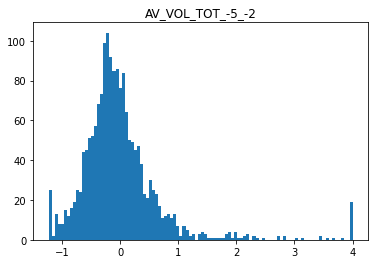

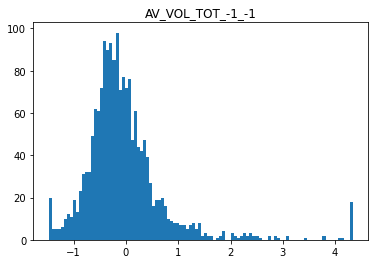

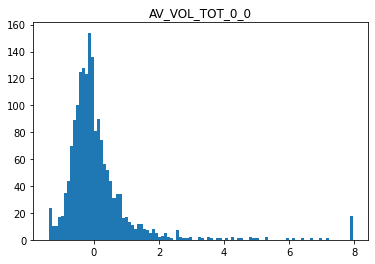

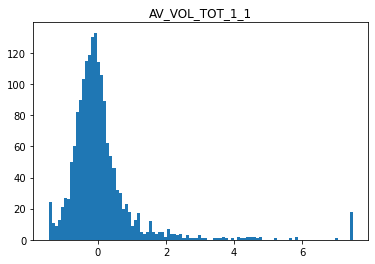

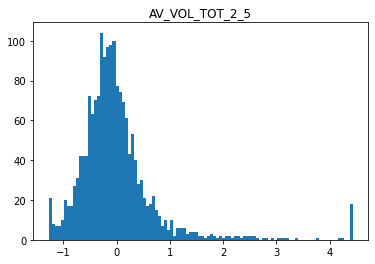

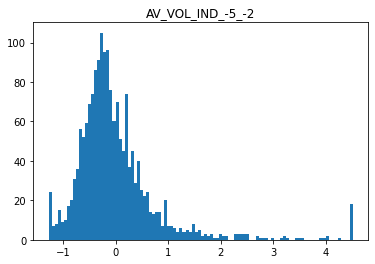

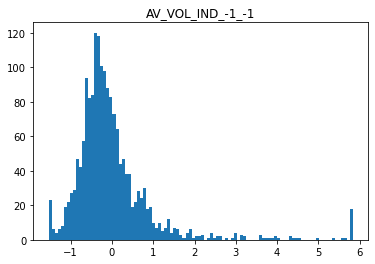

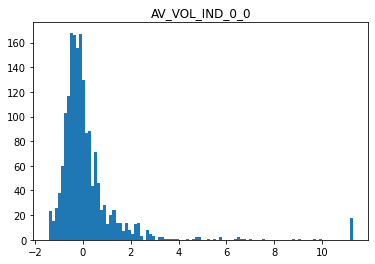

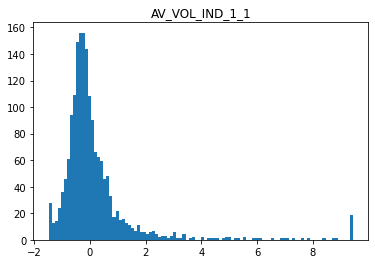

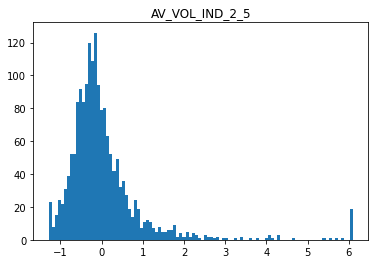

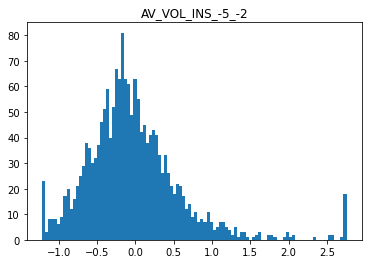

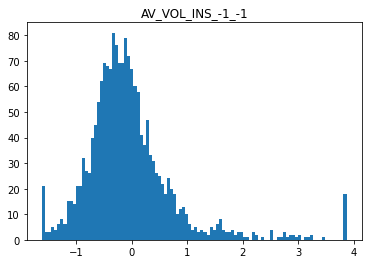

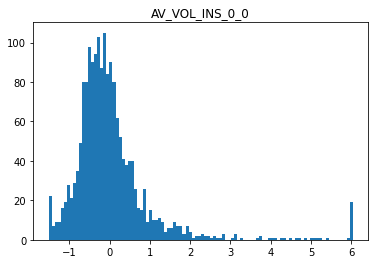

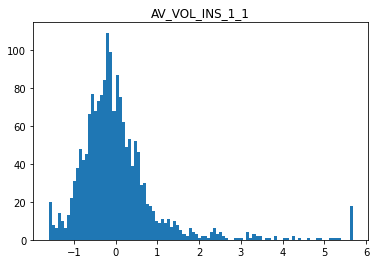

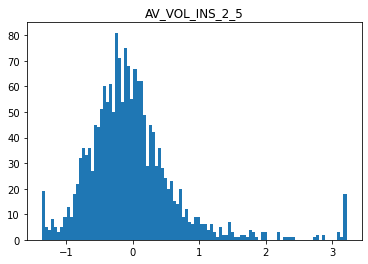

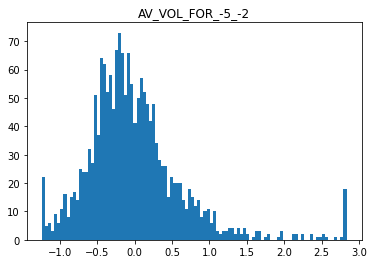

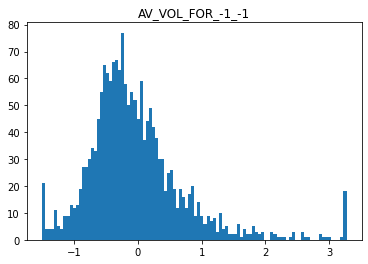

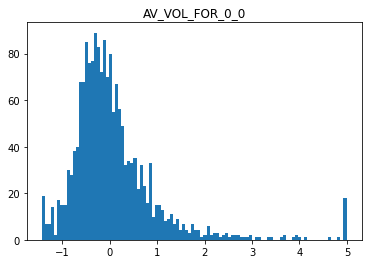

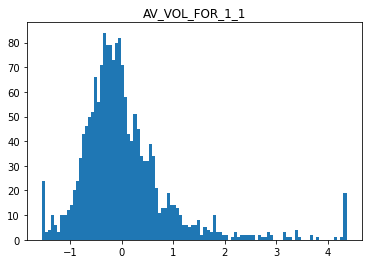

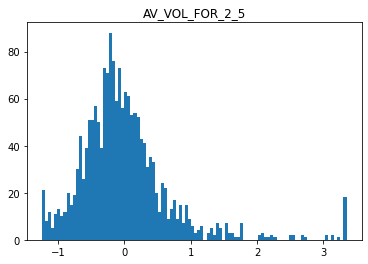

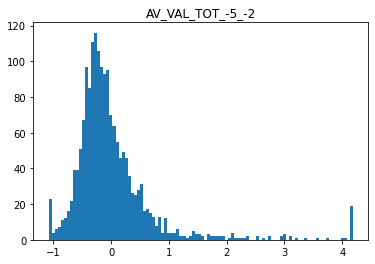

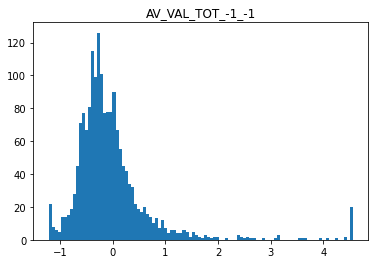

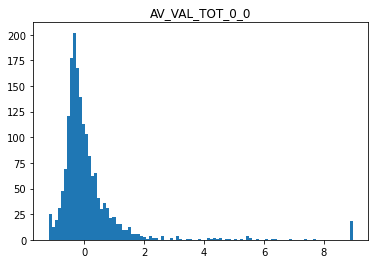

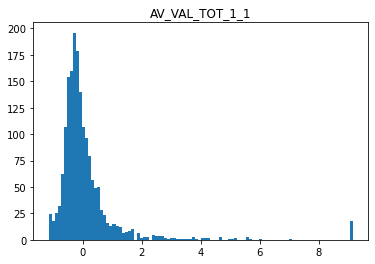

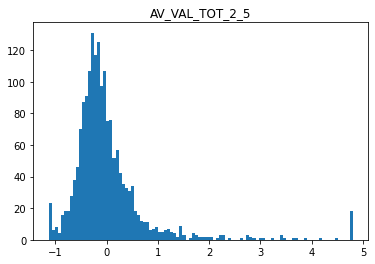

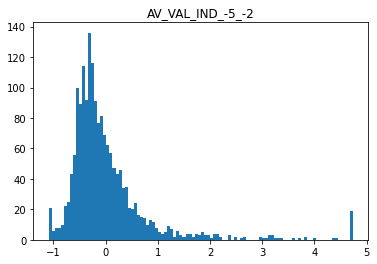

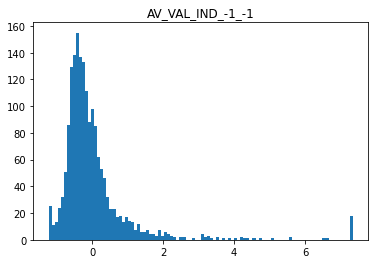

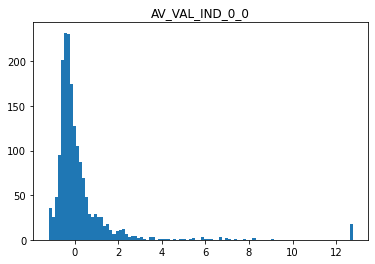

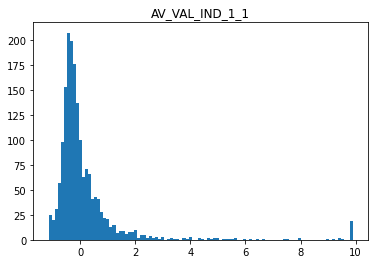

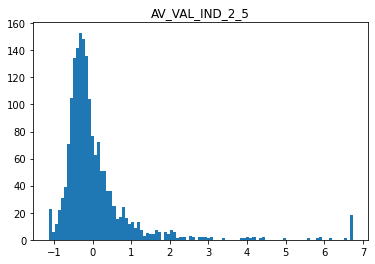

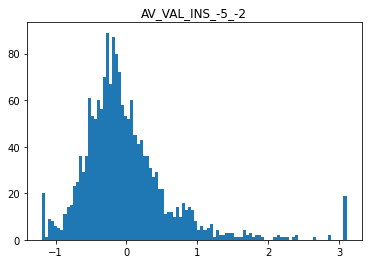

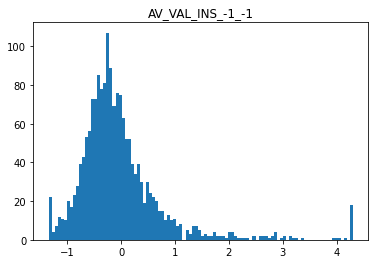

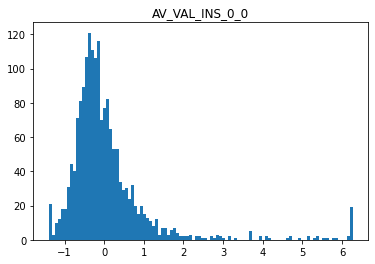

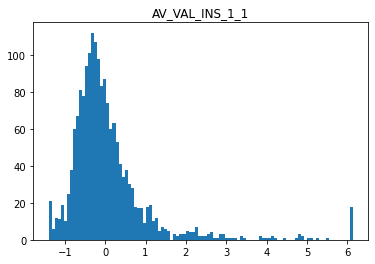

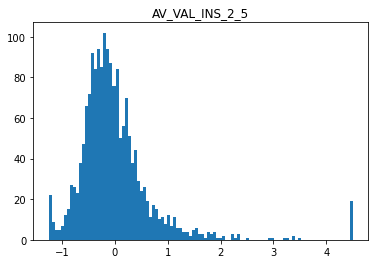

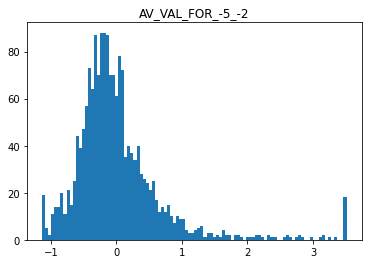

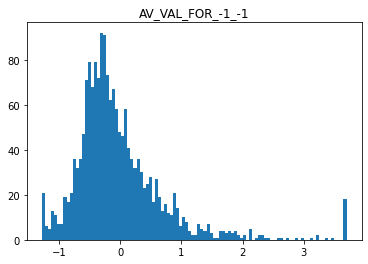

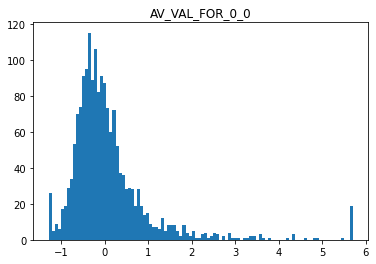

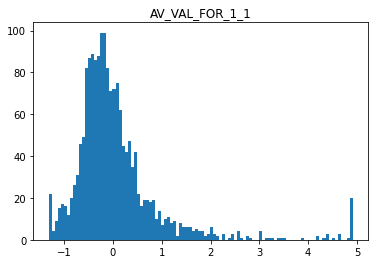

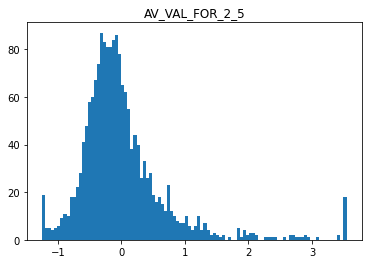

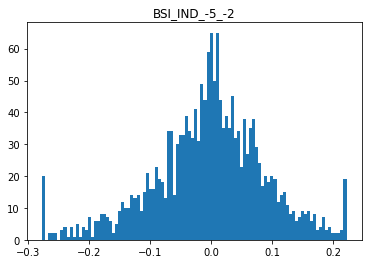

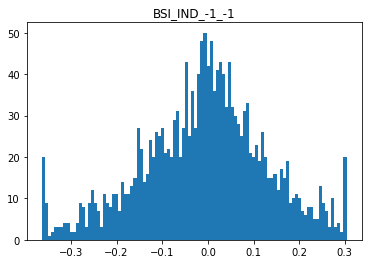

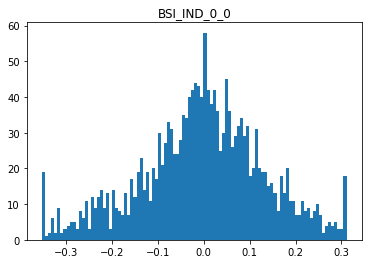

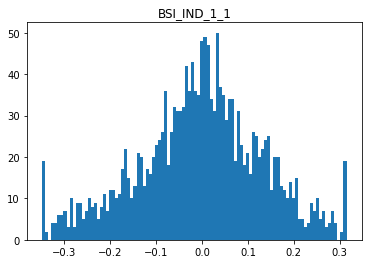

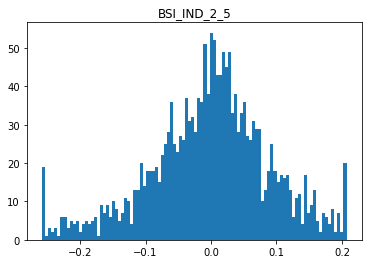

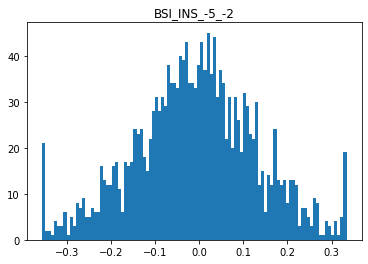

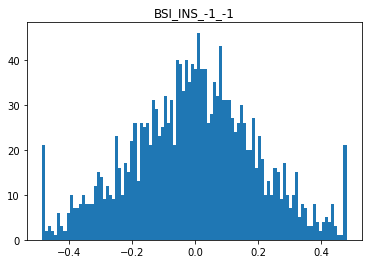

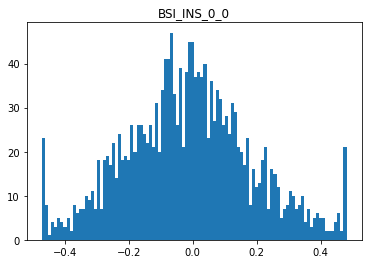

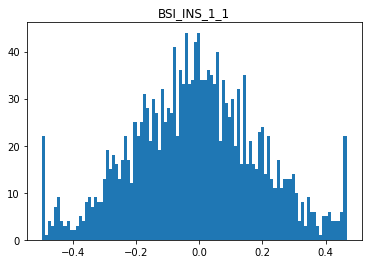

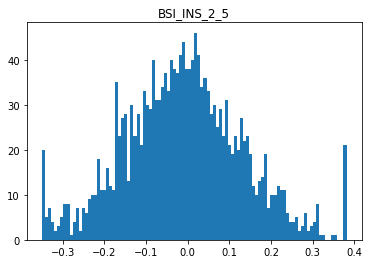

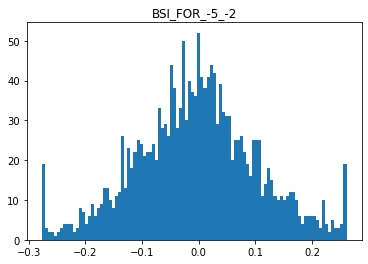

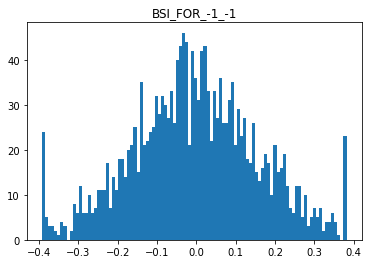

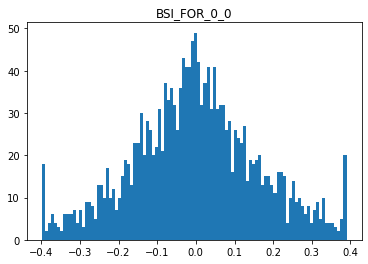

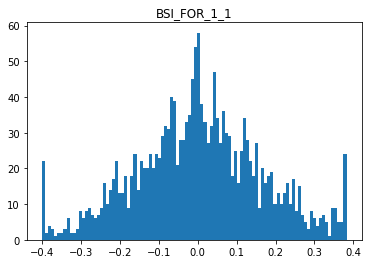

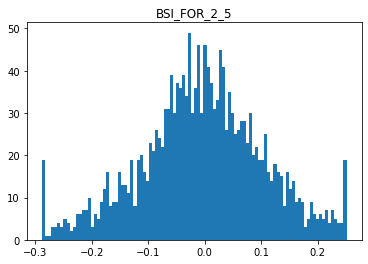

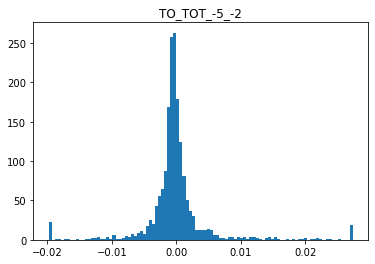

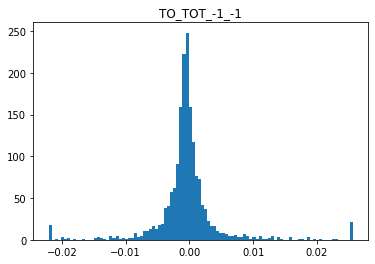

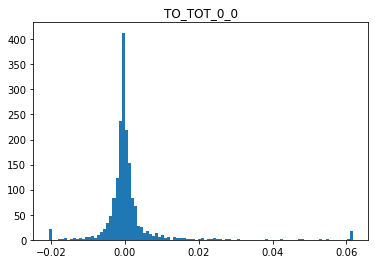

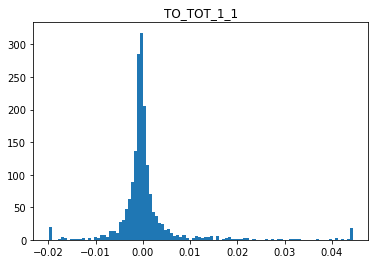

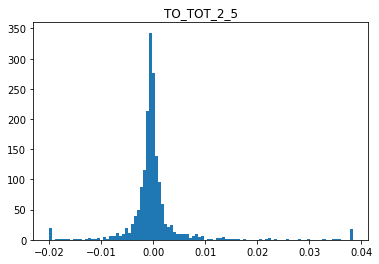

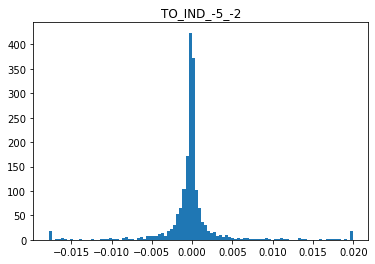

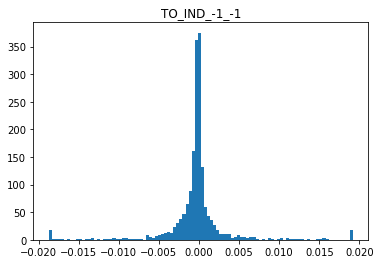

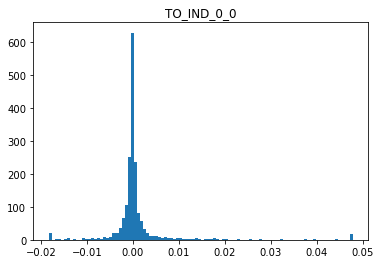

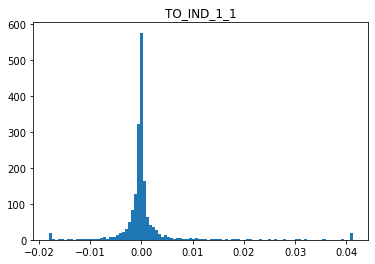

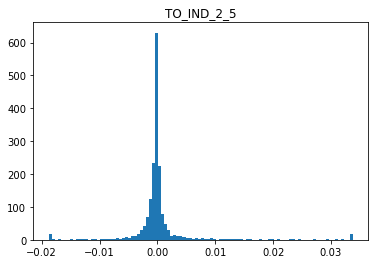

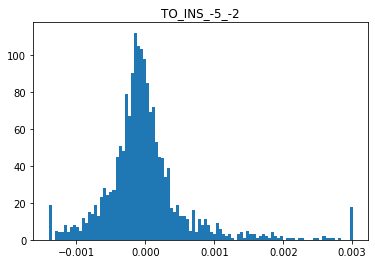

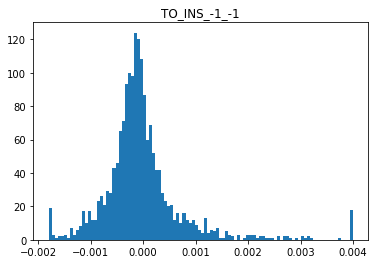

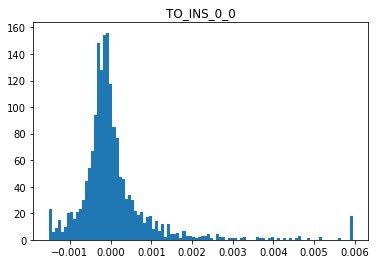

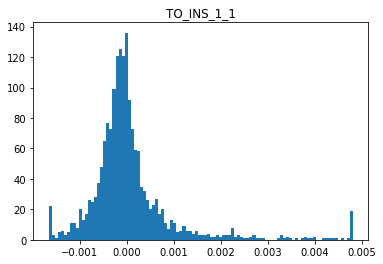

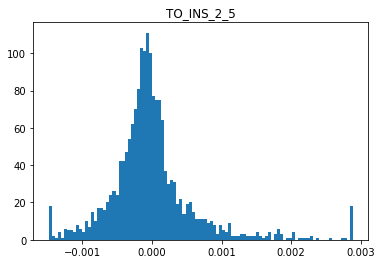

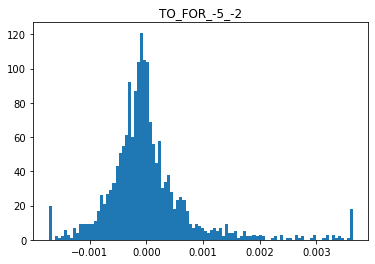

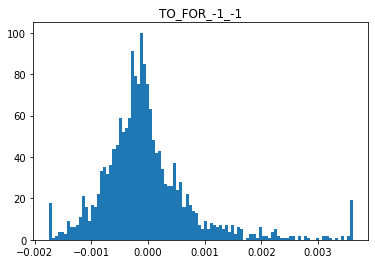

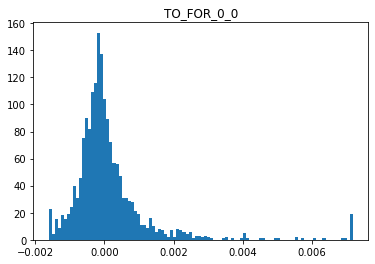

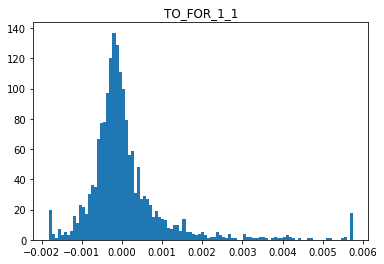

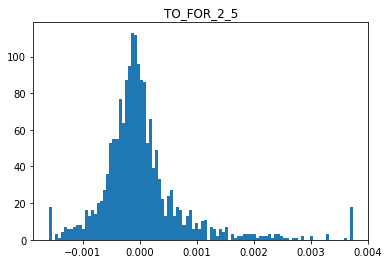

In [34]:
for i in col_m: 
    ms_win = [] # AV_TOT_-5_0 등을 담는 list
    for a, b in window:
        ms_win.append(i+'_'+str(a)+'_'+str(b))
    
    for x in ms_win:
        plt.hist(wins(df,x)[x], bins=100)
        plt.title(x)        
        plt.show()

# wilcoxon

## Total

In [26]:

for col in col_AV :  
    wilcoxon, p_value = scipy.stats.wilcoxon(df[col])
    print(col, '\n', 'median:', round(df[col].median(),5), 't-stats:', round(wilcoxon,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_BSI:
    wilcoxon, p_value = scipy.stats.wilcoxon(df[col])
    print(col, '\n', 'median:', round(df[col].median(),5), 't-stats:', round(wilcoxon,5), 'p-value:', round(p_value,5))
print('\n')
for col in col_TO:
    wilcoxon, p_value = scipy.stats.wilcoxon(df[col])
    print(col, '\n', 'median:', round(df[col].median(),5), 't-stats:', round(wilcoxon,5), 'p-value:', round(p_value,5))

AV_VOL_TOT_-5_-2 
 median: -0.12201 t-stats: 625306.0 p-value: 0.0
AV_VOL_TOT_-1_-1 
 median: -0.16631 t-stats: 582177.0 p-value: 0.0
AV_VOL_TOT_0_0 
 median: -0.12379 t-stats: 674060.0 p-value: 0.0
AV_VOL_TOT_1_1 
 median: -0.10816 t-stats: 663598.0 p-value: 0.0
AV_VOL_TOT_2_5 
 median: -0.1182 t-stats: 614106.0 p-value: 0.0
AV_VOL_IND_-5_-2 
 median: -0.16495 t-stats: 613927.0 p-value: 0.0
AV_VOL_IND_-1_-1 
 median: -0.21121 t-stats: 580292.0 p-value: 0.0
AV_VOL_IND_0_0 
 median: -0.15489 t-stats: 671480.0 p-value: 0.0
AV_VOL_IND_1_1 
 median: -0.17007 t-stats: 664755.0 p-value: 0.0
AV_VOL_IND_2_5 
 median: -0.16346 t-stats: 621347.0 p-value: 0.0
AV_VOL_INS_-5_-2 
 median: -0.11248 t-stats: 641887.0 p-value: 0.0
AV_VOL_INS_-1_-1 
 median: -0.16548 t-stats: 592901.0 p-value: 0.0
AV_VOL_INS_0_0 
 median: -0.14827 t-stats: 637697.0 p-value: 0.0
AV_VOL_INS_1_1 
 median: -0.13405 t-stats: 666858.0 p-value: 0.0
AV_VOL_INS_2_5 
 median: -0.09854 t-stats: 639900.0 p-value: 0.0
AV_VOL_FOR_-5_